## CSS Selector

구글에서 '한글'을 입력한 후 '다운로드 : 한글과컴퓨터'와 같은 제목의 링크들을 CSS selector로 가져올 것이다. 그렇게 하여 URL을 자동으로 돌도록 할 것이다.

In [1]:
import requests
from bs4 import BeautifulSoup

In [3]:
headers = {
    "user-agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
}

params = {
    "q" : "한글"
}

url = "https://www.google.com/search"

In [4]:
# 해당 url에 해당 파라미터로, 해당 에이전트를 이용하여 가져온다.
html = requests.get(url, params = params, headers = headers) 

In [6]:
type(html) # Response 객체

requests.models.Response

In [7]:
html.encoding

'UTF-8'

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><link href="/images/branding/product/ico/googleg_lodp.ico" rel="shortcut icon"><meta content="origin" name="referrer"><title>한글 - Google 검색</title><script nonce="fsXSKtMPD0J+DnPLw4rqqA==">(function(){window.google={kEI:\'ZURNW7S8FsGpoATUs7xI\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_ZURNW7S8FsGpoATUs7xI\',kGL:\'KR\'};google.kHL=\'ko\';})();google.time=function(){return(new Date).getTime()};google.timers={};google.startTick=function(c,b){var a=b&&google.timers[b].t?google.timers[b].t.start:google.time();google.timers[c]={t:{start:a},e:{},m:{}};(a=window.performance)&&a.now&&(google.timers[c].wsrt=Math.floor(a.now()))};google.startTick("webaft");google.startTick("load");</script><!--srt--><script nonce="fsXSKtMPD0J+DnPLw4rqqA==">(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b
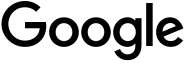
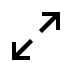
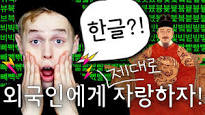
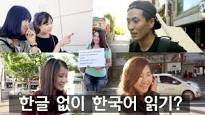
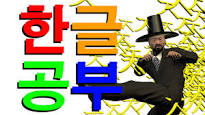
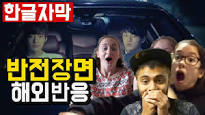
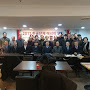
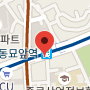
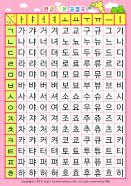
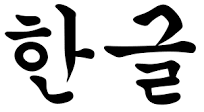
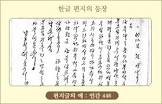
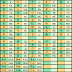
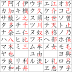
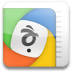

In [8]:
html.text 

html.text는 텍스트이므로 DOM tree로 만들어주어야 한다.

In [9]:
dom = BeautifulSoup(html.text, 'lxml')
type(dom) # BeautifulSoup 최상위의 객체

bs4.BeautifulSoup

[<a href="/search?q=%ED%95%9C%EA%B8%80&amp;gbv=1&amp;sei=ZURNW7S8FsGpoATUs7xI">여기</a>,
 <a aria-expanded="false" class="gb_b gb_dc" data-ogsr-alt="" href="https://www.google.co.kr/intl/ko/options/" role="button" tabindex="0" title="Google 앱"></a>,
 <a class="gb_5f gb_Aa gb_Eb" href="https://accounts.google.com/ServiceLogin?hl=ko&amp;passive=true&amp;continue=https://www.google.com/search%3Fq%3D%25ED%2595%259C%25EA%25B8%2580" id="gb_70" target="_top">로그인</a>,
 <a data-hveid="3" href="https://www.google.com/webhp?hl=ko&amp;sa=X&amp;ved=0ahUKEwj0go-H_KTcAhXBFIgKHdQZDwkQPAgD" id="logo" title="Google 홈페이지로 이동"><img alt="Google" height="44" src="/images/branding/googlelogo/2x/googlelogo_color_120x44dp.png" width="120"/></a>,
 <a href="//support.google.com/websearch/answer/186645?hl=ko">자세히 알아보기</a>,
 <a class="duf3 aciXEb" data-async-trigger="duf3-46" data-ved="0ahUKEwj0go-H_KTcAhXBFIgKHdQZDwkQtw8IBQ" href="#" id="sbfblt" jsaction="async.u">부적절한 예상 검색어 신고</a>,
 <a class="q qs" href="/search?
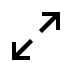

In [10]:
dom.select("a") # CSS Selector

rc 라는 div에서 h3태그의 class=r을 찾아가야 한다. 그리고 그중에서도 a태그에 접근해야 한다.

In [12]:
aList = dom.select("div.rc > h3.r > a")
aList

[<a href="http://www.hancom.com/downLoad.downPU.do" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=http://www.hancom.com/downLoad.downPU.do&amp;ved=0ahUKEwj0go-H_KTcAhXBFIgKHdQZDwkQFgglMAA">다운로드 : 한글과컴퓨터 - Hancom</a>,
 <a href="https://www.hancom.com/product/productWindowsMain.do" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.hancom.com/product/productWindowsMain.do&amp;ved=0ahUKEwj0go-H_KTcAhXBFIgKHdQZDwkQFggyMAE">Windows : 한글과컴퓨터 - Hancom</a>,
 <a href="https://namu.wiki/w/%ED%95%9C%EA%B8%80" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://namu.wiki/w/%25ED%2595%259C%25EA%25B8%2580&amp;ved=0ahUKEwj0go-H_KTcAhXBFIgKHdQZDwkQFghEMAI">한글 - 나무위키</a>,
 <a href="https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://ko.wikipedia.org/wiki/%25ED%2595%259C%25EA%25B8%2580&amp;ved=0ahUKEwj0go-H_KTcAhXBFIgKHdQZDwkQFgh0MAs">한글 - 위키백과, 우리 모두의 백과사전</a>,
 <a href="https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%E

In [14]:
for row in aList:
    print(row['href'])

http://www.hancom.com/downLoad.downPU.do
https://www.hancom.com/product/productWindowsMain.do
https://namu.wiki/w/%ED%95%9C%EA%B8%80
https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80
https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8
https://www.korean.go.kr/hangeul/principle/001.html
https://www1.president.go.kr/petitions/154276
http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y
https://www.microsoft.com/ko-kr/download/details.aspx?id=36772


위의 과정을 수행하는 함수를 정의해보자

In [64]:
def getUrl_ver01(url, params = None, num_retries = 2) : # Default 값으로 None을 두면 있어도 되고 없어도 되는 것을 의미한다.
    html = requests.get(url, params=params, headers = headers)
    
    if 500 <= html.status_code < 600 and num_retries > 0 :
        print(html.status_code, html.reason)
        return getUrl(url, params, num_retries-1)
    
    dom = BeautifulSoup(html.text, 'lxml')
    links = dom.select("div.rc > h3.r > a")
    
    return [link['href'] for link in links]

In [65]:
links = getUrl_ver01(url, params)
len(links)

0

In [66]:
links

[]

이번에는 seed URL을 우리가 직접 입력하지 않고 리스트를 이용하여 queue의 선입선출 구조로 처리해 볼 것이다.

In [58]:
def getUrl_ver02(url, params = None, select = 'a', num_retries = 2) : # Default 값으로 None을 두면 있어도 되고 없어도 되는 것을 의미한다.
    html = requests.get(url, params = params, headers = headers)
    
    if 500 <= html.status_code < 600 and num_retries > 0 :
        print(html.status_code, html.reason)
        return getUrl_ver02(url, params, num_retries-1)
    
    dom = BeautifulSoup(html.text, 'lxml')
    links = dom.select(select)
    
    return [link['href'] for link in links if link.has_attr("href") == True ] # 링크에 href 속성이 있을 경우

In [59]:
seed = "https://www.google.com/search"
select = 'div.rc > h3.r > a'
queue = getUrl_ver02(seed, params, select)
result = list()

In [60]:
while queue :
    url = queue.pop()
    result.extend(getUrl_ver02(url, params, select)) # 반환된 리스트의 정보를 Queue에 덮어 씌운다.
    print(url, len(queue))
    select = 'a'

https://www.microsoft.com/ko-kr/download/details.aspx?id=36772 8
http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y 7
https://www1.president.go.kr/petitions/154276 6
https://www.korean.go.kr/hangeul/principle/001.html 5
https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8 4
https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80 3
https://namu.wiki/w/%ED%95%9C%EA%B8%80 2
https://www.hancom.com/product/productWindowsMain.do 1
http://www.hancom.com/downLoad.downPU.do 0


---
## 뽐뿌 자유게시판을 이용한 크롤링 실습

In [61]:
def pp_crawler(url, params = None, select = 'a', num_retries = 2) : # Default 값으로 None을 두면 있어도 되고 없어도 되는 것을 의미한다.
    html = requests.get(url, params = params, headers = headers)
    
    if 500 <= html.status_code < 600 and num_retries > 0 :
        print(html.status_code, html.reason)
        return pp_crawler(url, params, num_retries-1)
    
    dom = BeautifulSoup(html.text, 'lxml')
    links = dom.select(select)
    
    return [link['href'] for link in links if link.has_attr("href") == True ] # 링크에 href 속성이 있을 경우

In [63]:
pp_seed = "http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard"
pp_html = requests.get(pp_seed, params=params, headers=headers)
pp_html.text # 한글이 깨지기 때문에 urllib를 쓰는 방법도 있다.

'\x1f�\x08\x00\x00\x00\x00\x00\x00\x03�}�\x7f培�偵淚s��\tZ��F|�-��M��f7M��쁨쉰?��$$�\x02\x01\x06\x00%����酬I7M�P\x15%��(���n�HI�M韻IZ��舫�&�[�m�炘s\x06\x00\tR$E�\x01뺨�H&�3��9s�;g筐\x00�\x1fz戌#G���\'IT�\t���=��3G\x08�t뼁�{쿠~淳\x13癌�茁w�%^��\x1c�YQ�U^\x12Y쥼~�9�0QU��멓SSS��^�$���~�}\x12yy굅鑄�ZJ�"j�\tt\x1e�;�\x0f�F��\x18㎠\x04�9��\x12華�9"�*\'のＳq�!a���Q���\x1b���p��\x15N�s��sBf��\x11�\x17�2\x1f�功\x04;�*遞N<�i�ド"�(u龕��{�9�H�8ヲ!�Z��\'�\\d�c�R"\x1b尋\x0c�P��l!{��玲簒\x0b�#G�wU�F8]k값�~�\x17K�W\x11Np�S�\x1cQ,T@拏y�!㎡�p�獵���Z\x08���\x1a�G�I>�9��\x1e����оT짭쟬�3zH\x0c��\x121瑜�쪼�;\x0b充OsJ\x0fQYy�S�\x11\x0e�a:\x12�M폅�博繞zQ�睡\x14�du博H�#|�\x1d�\x1a穹w�8X7�p�%��利���\x07� \x1b�\x07}\x1e��㎻7����TD-��\r\x17D\x13T�Q/�智�\x05�\x02q\x12�\x13牆��밌��a�~\x03�xX瑄\t\x12��1올�m\x0c8)�qI\x1a\x1786�+�`\x0c\x1d襄16�\x0b桃�$Uz�E�\x17\x0e"s�傘�w)Q�S\x1dD\x05\x1f�;L�r\x04�]t\x19H��i\x19�錄�T\t��m蓆��t�\x1a�~것�g汲�\x0e佑�o�i��Bⓖ\x1d翅�3O\x1e�w���R�j\x0f\x1d猜\x08?v\\w0츠u寓쨋iS_�\x1a暘\x13!�d�\x03�臧\x0cz�\\\x06 \x18�솖Z�0$�r�\x1dy)��\r녀�*\x1b\nRi썅缶\x12�X$\x01�ⓤ�

In [67]:
pp_headers = {
    "user-agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36",
    "accept-encoding" : "false"
}

In [69]:
pp_html = requests.get(pp_seed, params=params, headers= pp_headers) # pp_headers를 넣어주면 euc-kr로 인한 현상을 막을 수 있다.
pp_html.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html>\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr" />\n<meta http-equiv="Content-Script-Type" content="text/javascript" />\n<meta http-equiv="Content-Style-Type" content="text/css" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="author" content="PPOMPPU CO.">\n<meta name="description" content="뽐뿌">\n<meta name="keywords" content="">\n\n\n<!--\n<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, user-scalable=yes, target-densitydpi=device-dpi" />\n-->\n\n\n<meta property="og:image" content="http://www.ppomppu.co.kr/images/icon_app_20160427.png" />\n\n<meta property="og:site_name" content="뽐뿌" />\n\n<title>뽐뿌 - 자유게시판</title><!--<link href=\'http://fonts.googleapis.com/css?family=Noto+Sans\' rel=\'stylesheet\' type=\'text/css\'>-->\n\n<link rel="stylesheet" type="text/css" hr

뽐뿌는 표준을 지키지 않았기 때문에 lxml로 가져올 때 태그가 깨져서 제대로 가져올 수 없다. 따라서 lxml로 가져오는 것이 아니라 html.parser로 가져와야 한다.

In [183]:
def pp_crawler_ver02(url, params = None, select = 'a', num_retries = 2) : # Default 값으로 None을 두면 있어도 되고 없어도 되는 것을 의미한다.
    html = requests.get(url, params = params, headers = {"user-agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36",
    "accept-encoding" : "false"})
    
    if 500 <= html.status_code < 600 and num_retries > 0 :
        print(html.status_code, html.reason)
        return pp_crawler(url, params, num_retries-1)
        
    dom = BeautifulSoup(html.text, 'html.parser') # html.parser로 가져와야 한다.
    links = dom.select(select)
    
    return [link['href'] for link in links if link.has_attr("href") == True ] # 링크에 href 속성이 있을 경우

In [184]:
pp_select = 'td.list_vspace img + a' # img 태그 다음에 있는 a태그로 한정지어줌

In [186]:
contentList = pp_crawler_ver02(pp_seed, params = params, select = pp_select)
contentList

['view.php?id=regulation&page=1&divpage=202&no=6',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951975',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951974',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951973',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951972',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951971',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951970',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951969',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951968',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951967',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951966',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951965',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951964',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951963',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951962',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951961',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951960',
 'view.php?id=freeboard&page=1&divpag

In [131]:
# bs = BeautifulSoup(pp_html.text, 'html.parser') # html.parser로 가져와야 한다.
# bs.select("td.list_vspace img + a") # img 태그 다음에 있는 a 태그로 한정지어줌

[<a href="view.php?id=regulation&amp;page=1&amp;divpage=202&amp;no=6">[필독] 제목에는 특수 문자 사용을 절대 금지합니다.- 2010년 2월 24일</a>,
 <a href="view.php?id=freeboard&amp;page=1&amp;divpage=1111&amp;no=5951700"><font class="list_title">편의점 본사 지급 수수료가 개10 노예계약인 이유 설명한다.(펌)</font></a>,
 <a href="view.php?id=freeboard&amp;page=1&amp;divpage=1111&amp;no=5951699"><font class="list_title">女軍 ‘미투’에 누명 쓴 부사관… 무죄 밝혀졌지만 집안은 ‘풍비박산’</font></a>,
 <a href="view.php?id=freeboard&amp;page=1&amp;divpage=1111&amp;no=5951698"><font class="list_title">연예계에서 이사람의 기회주의는 어떤가요.....</font></a>,
 <a href="view.php?id=freeboard&amp;page=1&amp;divpage=1111&amp;no=5951697"><font class="list_title">불매운동 기준이 먼지 ㅋㅋㅋ</font></a>,
 <a href="view.php?id=freeboard&amp;page=1&amp;divpage=1111&amp;no=5951696"><font class="list_title">교묘하게 벌레짓 하는 놈들도 많네요</font></a>,
 <a href="view.php?id=freeboard&amp;page=1&amp;divpage=1111&amp;no=5951695"><font class="list_title">인권위원장 내정자인 최영애 씨 프로필 상황</font></a>,
 <a href="view.php?id=freeboard&amp;page

---
## 스크래핑

In [187]:
contentList

['view.php?id=regulation&page=1&divpage=202&no=6',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951975',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951974',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951973',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951972',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951971',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951970',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951969',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951968',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951967',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951966',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951965',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951964',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951963',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951962',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951961',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951960',
 'view.php?id=freeboard&page=1&divpag

In [188]:
def getContent(url, params = None, select = 'a', num_retries = 2) : # Default 값으로 None을 두면 있어도 되고 없어도 되는 것을 의미한다.
    html = requests.get(url, params = params, headers = {"user-agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36",
    "accept-encoding" : "false"})
    
    if 500 <= html.status_code < 600 and num_retries > 0 :
        print(html.status_code, html.reason)
        return pp_crawler(url, params, num_retries-1)
    
    dom = BeautifulSoup(html.text, 'html.parser') # html.parser로 가져와야 한다.
    links = dom.select(select)
    
    return links

In [218]:
seed = "http://www.ppomppu.co.kr/zboard/"
each = getContent(seed + contentList[1], params, ".view_title2")
each[0].text

'대한통운 물건 빼돌리기가 이거인가요?'

In [220]:
title = []
for url in contentList:
    each = getContent(seed + url, params, ".view_title2")
    title.append(each[0].text)
title

['전체 게시판 이용규칙',
 '대한통운 물건 빼돌리기가 이거인가요?',
 '시진핑 사진훼손한 여성, 가족들과 함께 실종',
 '아 오능 태극기 게양 안했네요...',
 '아이추워',
 '메가박스 상암월드컵경기장점 시사회',
 '(펌) 김어준.."문대통령..역사에 기록될 명령!!"',
 '요즘 하루에 물을 3리터도 더마시는거같네요',
 '이제 070은 거의가 광고라고 봐도 무방하겠죠?',
 '카드수수료는 소비자가 부담하는 게 맞지 않나요?',
 '개고기 먹는다고 말들이 많네요...',
 '이런 연예인 머리 스타일 미용실 가서 해달라고 하기에 무난할까여',
 '이언주 의원 삼행시',
 '삼시세끼 닭먹으려니  힘드네요ㅋㅋ',
 '에어컨 밑에 있으니까 기분이 묘하네요',
 '오늘초복이죠',
 '스탠드 에어컨 구매시 딸려오는 벽걸이 에어컨을 빼주라하면 얼마나 깍아줄려나요.',
 '나부터 명찰 달겠다”…이재명 ‘공무원 명찰 패용’ 강행 의지',
 '이재명, 靑에 경기조달청 신설 건의, 분쟁조정권 이양과 근로감독권 부여도 요구',
 '[나눔] 수~목요일 연극 2편 나눔합니다.',
 '아가리 벌려라~ 동전 들어간다!',
 '김어준의 다스뵈이다 꼭 보세요.',
 '김부겸 결국 대통령 걸고 넘어지다가 당대표 불출마 선언 ...',
 "창가 앉은 손님 몰래 '찰칵'…불법촬영 사각지대 '통유리 카페",
 '설탕 액정 s8',
 '커피에 메로나를 통째로 녹여먹었는데 맛있네요',
 "한달 맞은 갓재명 경기도통령 인수위.. 주민 간담회 등 '소통' 주력",
 ' 개인사업을 하는데 요즘 진짜 경기 안 좋네요 ㅜㅜ',
 '볼때마다 떠오르는 혜경궁 김씨 수사한지가 언젠대.',
 '여부사관 성추행 사건 보이 우리 부대 여부사관 생각나네요',
 '근데 다문화 가정 우대가 많나요?']

## 댓글 크롤링까지 실습

In [231]:
rep = getContent(seed + url, params, "div.han")

for each in rep :
    print(each.text)
    print()

제가 듣기로는 애들 나중에 공립유치원 갈때 1순위?? 그게 가장 좋은 우대라고 하더라구요

아파트 분양할 때 다문화 특별공급도 있던걸로

어린이집공짜로 다니더라구요. 그것도 나이제한이 있다고하던데

다문화가족만 대상으로 하여 공무원임용도 하는 븅신같은 짓도 하는데요 뭐

제가느낀부분은

어린이집. 병설유치원지원시 순위가 높아요

학교에서도 큰 특별대우는 아니더라도 다문화가정 지원해서 예산들 많이 쓰입니다.

찾아보면 다문화 지원 정책 엄청 많습니다.
자국민만 역차별 개쩔죠

와이프가 외국인인데요. 저도 직접적 관련이 있다보니 이것저것 찾아봤었습니다. 근데 다문화 가족에 대한 혜택 떠돌아다니는거 대부분은 낭설입니다. 물론 아예 없는건 아니지만 상대적 박탈감 느낄만한 혜택은 극히 드물어요. 금리우대 같은 것도 다른 거랑 중복되는게 아니라(예를 들어 신혼부부 금리우대를 받으면 다문화 금리우대는 적용 못 받음. 신혼 다문화 가정이면 이게 무슨 의미인지...) 실질적으로는 있으나 마나한 혜택이구요. 있으면 저 좀 알려주세요.

분양우대 임대우대 국가지원대출의 경우 금리우대 제가 아는건 여기까지...

다문화x애2명 = 문재인 서울 반값아파트 100%당첨. (쉿)

그거랑 청약이랑 뭐 있다고 들은거 같은데
사실상 관련 정부 홈페이지들어가면 내용은 없더라구여 없어진건지

공감 혜택본게 암것도 없네요
있으면 좀 알려주세요



In [239]:
rep_list = []
for url in contentList:
    each_rep = getContent(seed + url, params, "div.han")
    for i in range(len(each_rep)) :
        each_rep[i] = each_rep[i].text
    rep_list.append(each_rep)

rep_list

[[],
 ['제물건도 도착지까지 왔다가 옥천으로 다시갔어요\n물론 cj. ㅋㅋ',
  '반말아닌가요??',
  '대한통운으로 물건 받기 참 힘들어졌습니다 ^^*',
  '권오갑 아저씨면 스마일 배송인데...'],
 ['ㄷㄷㄷㄷㄷㄷ',
  '저기도 ㅁㅊㄴ이 있군요.',
  '헐.,,,ㅎㄷㄷ;;;',
  '아무리 대한민국이 싫어도 중국인으로 안태어난건 탁월한 내운빨..',
  'ㅈㄴ 무섭..',
  '가족은 왜 납치해가는지 \n조선족아 니네 나라 무섭다',
  '놀랄 것도 없이 저게 중국이죠.'],
 ['헐.. 오늘 제헌절이였군요.\n\n어쩐지 거리에 태극기가 있더니만'],
 [],
 ['Aㅏ, 위대한 쇼맨 보고싶었는데...이미 지나갔네요ㅜㅜㅜ엉엉엉',
  '오전부터배부에요',
  '어제 레디플레이어원 보고왔는데.. 물어보니 오전9시부터 나눠준다고 하네요..\n저는 낮에 가도 표 있었어요..',
  '오전부터 배부면 퇴근 후 가시는 분들은 헛걸음 할수 있겠네요.\n그냥 집에서 쉬는게 ㅎㅎ',
  '오 안봤는데 보러가야겠어요 정보 감사해요',
  '오 전에도 하더니 계속하네요~~'],
 ['그저 문대통령님의 정신력이 존경스러울뿐입니다'],
 ['운동은 오전9시 이전이나 오후 5시 이후로 1시간30분응 넘지 않게 하는게 좋은거 같아요.',
  '날씨 좋은날 3시간반 운동해도 힘들듯..',
  '오전에 7시30분~9시20분 정도까지하고 오후에도 하는데 11시반이나 3시쯤 합니다....오후가 죽어요 ㅠㅠ',
  '4리터 마시니까 피부가 확 달라지던데요',
  '고딩시절 몸매로 돌아가보려고 애쓰는중입니다 ㅋㅋ',
  '이날씨에요? 오 건강하신듯',
  '저도 좀 체감해보고싶습니다 ㅠㅠ',
  '건강해지려고 억지로하는중입니다 ㅋㅋ',
  '피부 짱 좋아질듯',
  '운동하면서 땀흘리고 햇빛에 장시간 노출되어서 더 안좋아지는거같아요 ㅠㅠ'],
 ['저희 사무실 직통번호는 070입니다 ㅠㅠ ㅋㅋ',
  '070전화는 아예 안받아도 아무 지장 없습니다.\n\n급한건 전화 거는쪽

In [244]:
for each_list in rep_list :
    for each_rep in each_list :
        print(each_rep)
    print('-'*60)

------------------------------------------------------------
제물건도 도착지까지 왔다가 옥천으로 다시갔어요
물론 cj. ㅋㅋ
반말아닌가요??
대한통운으로 물건 받기 참 힘들어졌습니다 ^^*
권오갑 아저씨면 스마일 배송인데...
------------------------------------------------------------
ㄷㄷㄷㄷㄷㄷ
저기도 ㅁㅊㄴ이 있군요.
헐.,,,ㅎㄷㄷ;;;
아무리 대한민국이 싫어도 중국인으로 안태어난건 탁월한 내운빨..
ㅈㄴ 무섭..
가족은 왜 납치해가는지 
조선족아 니네 나라 무섭다
놀랄 것도 없이 저게 중국이죠.
------------------------------------------------------------
헐.. 오늘 제헌절이였군요.

어쩐지 거리에 태극기가 있더니만
------------------------------------------------------------
------------------------------------------------------------
Aㅏ, 위대한 쇼맨 보고싶었는데...이미 지나갔네요ㅜㅜㅜ엉엉엉
오전부터배부에요
어제 레디플레이어원 보고왔는데.. 물어보니 오전9시부터 나눠준다고 하네요..
저는 낮에 가도 표 있었어요..
오전부터 배부면 퇴근 후 가시는 분들은 헛걸음 할수 있겠네요.
그냥 집에서 쉬는게 ㅎㅎ
오 안봤는데 보러가야겠어요 정보 감사해요
오 전에도 하더니 계속하네요~~
------------------------------------------------------------
그저 문대통령님의 정신력이 존경스러울뿐입니다
------------------------------------------------------------
운동은 오전9시 이전이나 오후 5시 이후로 1시간30분응 넘지 않게 하는게 좋은거 같아요.
날씨 좋은날 3시간반 운동해도 힘들듯..
오전에 7시30분~9시20분 정도까지하고 오후에도

---

## 복습

In [246]:
import requests 

In [248]:
data = requests.get('http://www.daum.net')

In [249]:
data.content

b'<!DOCTYPE html>\n<html lang="ko" class="">\n<head>\n<meta charset="utf-8"/>\n<title>Daum</title>\n<meta property="og:url" content="https://www.daum.net/">\n<meta property="og:type" content="website">\n<meta property="og:title" content="Daum">\n<meta property="og:image" content="//i1.daumcdn.net/svc/image/U03/common_icon/5587C4E4012FCD0001">\n<meta property="og:description" content="\xeb\x82\x98\xec\x9d\x98 \xea\xb4\x80\xec\x8b\xac \xec\xbd\x98\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xea\xb0\x80\xec\x9e\xa5 \xec\xa6\x90\xea\xb2\x81\xea\xb2\x8c \xeb\xb3\xbc \xec\x88\x98 \xec\x9e\x88\xeb\x8a\x94 Daum">\n<meta name="msapplication-task" content="name=Daum;action-uri=https://www.daum.net/;icon-uri=/favicon.ico">\n<meta name="msapplication-task" content="name=\xeb\xaf\xb8\xeb\x94\x94\xec\x96\xb4\xeb\x8b\xa4\xec\x9d\x8c;action-uri=http://media.daum.net/;icon-uri=/media_favicon.ico">\n<meta name="msapplication-task" content="name=\xeb\xa9\x94\xec\x9d\xbc;action-uri=http://mail.daum.net;icon-uri=

In [252]:
type(data.content)

bytes

In [250]:
data.text

'<!DOCTYPE html>\n<html lang="ko" class="">\n<head>\n<meta charset="utf-8"/>\n<title>Daum</title>\n<meta property="og:url" content="https://www.daum.net/">\n<meta property="og:type" content="website">\n<meta property="og:title" content="Daum">\n<meta property="og:image" content="//i1.daumcdn.net/svc/image/U03/common_icon/5587C4E4012FCD0001">\n<meta property="og:description" content="나의 관심 콘텐츠를 가장 즐겁게 볼 수 있는 Daum">\n<meta name="msapplication-task" content="name=Daum;action-uri=https://www.daum.net/;icon-uri=/favicon.ico">\n<meta name="msapplication-task" content="name=미디어다음;action-uri=http://media.daum.net/;icon-uri=/media_favicon.ico">\n<meta name="msapplication-task" content="name=메일;action-uri=http://mail.daum.net;icon-uri=/mail_favicon.ico">\n<meta name="referrer" content="origin">\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="다음">\n<style type="text/css">\n@charset "utf-8";\nbody,div,dl,dt,dd,ul,ol,li,h1,h2,h3,h4,h5,

In [251]:
type(data.text)

str

1. 이 위에서 regular expression을 활용하여 필요한 데이터를 가져올 수 있다.
2. 이 위에서 BeautifulSoup을 이용하여 필요한 데이터를 가져올 수 있다. 
3. lxml만 쓰거나 BeautifulSoup와 lxml을 함께 쓴다.
  - C 기반인 lxml과 함께 사용할 수 있다. C 기반이라 빠르다.
  - XML을 parsing 하는 방법으로 XPath의 방법 또한 있다. => 공부하라 ! 툴 사용하기 위한 방법 / 개발에 활용하는 방법

In [253]:
# 우아하지 않은 아주 간단한 방법
'문근영' in data.text

False

보다 우아한 방법이 BeautifulSoup와 lxml이다.

In [301]:
data = requests.get("http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty?serviceKey=DTemrBfpK5BRlHJV6BO07rWP5lf7venPr%2Bdn44FPqk%2FdjjMXBr6k6%2BIDUo4m4xkIEyAubec%2BTI0pNhNf75vwXQ%3D%3D&numOfRows=10&pageSize=10&pageNo=1&startPage=1&stationName=%EC%A2%85%EB%A1%9C%EA%B5%AC&dataTerm=DAILY&ver=1.3")

ConnectionError: HTTPConnectionPool(host='openapi.airkorea.or.kr', port=80): Max retries exceeded with url: /openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty?serviceKey=DTemrBfpK5BRlHJV6BO07rWP5lf7venPr%2Bdn44FPqk%2FdjjMXBr6k6%2BIDUo4m4xkIEyAubec%2BTI0pNhNf75vwXQ%3D%3D&numOfRows=10&pageSize=10&pageNo=1&startPage=1&stationName=%EC%A2%85%EB%A1%9C%EA%B5%AC&dataTerm=DAILY&ver=1.3 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x11bd64908>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [257]:
data.text

'<?xml version="1.0" encoding="UTF-8"?>\r\n\r\n\r\n\r\n\r\n<response>\r\n\t<header>\r\n\t\t<resultCode>00</resultCode>\r\n\t\t<resultMsg>NORMAL SERVICE.</resultMsg>\r\n\t</header>\r\n\t<body>\r\n\t\t<items>\r\n\t\t\t\r\n\t\t\t\t<item>\r\n\t\t\t\t\t<dataTime>2018-07-17 17:00</dataTime>\r\n\t\t\t\t\t\r\n                        <mangName>도시대기</mangName>\r\n                    \r\n\t\t\t\t\t<so2Value>0.006</so2Value>\r\n\t\t\t\t\t<coValue>0.2</coValue>\r\n\t\t\t\t\t<o3Value>0.020</o3Value>\r\n\t\t\t\t\t<no2Value>0.014</no2Value>\r\n\t\t\t\t\t<pm10Value>37</pm10Value>\r\n\t\t\t\t\t\r\n                        <pm10Value24>37</pm10Value24>\r\n                    \r\n\t\t\t\t\t\r\n                        <pm25Value>34</pm25Value>\r\n                    \r\n                    \r\n                        <pm25Value24>28</pm25Value24>\r\n                    \r\n\t\t\t\t\t<khaiValue>82</khaiValue>\r\n\t\t\t\t\t<khaiGrade>2</khaiGrade>\r\n\t\t\t\t\t<so2Grade>1</so2Grade>\r\n\t\t\t\t\t<coGrade>1</c

In [263]:
from bs4 import BeautifulSoup
data2 = BeautifulSoup(data.text, 'lxml')
data2

<?xml version="1.0" encoding="UTF-8"?><html><body><response>
<header>
<resultcode>00</resultcode>
<resultmsg>NORMAL SERVICE.</resultmsg>
</header>
<items>
<item>
<datatime>2018-07-17 17:00</datatime>
<mangname>도시대기</mangname>
<so2value>0.006</so2value>
<covalue>0.2</covalue>
<o3value>0.020</o3value>
<no2value>0.014</no2value>
<pm10value>37</pm10value>
<pm10value24>37</pm10value24>
<pm25value>34</pm25value>
<pm25value24>28</pm25value24>
<khaivalue>82</khaivalue>
<khaigrade>2</khaigrade>
<so2grade>1</so2grade>
<cograde>1</cograde>
<o3grade>1</o3grade>
<no2grade>1</no2grade>
<pm10grade>2</pm10grade>
<pm25grade>2</pm25grade>
<pm10grade1h>2</pm10grade1h>
<pm25grade1h>2</pm25grade1h>
</item>
<item>
<datatime>2018-07-17 16:00</datatime>
<mangname>도시대기</mangname>
<so2value>0.008</so2value>
<covalue>0.3</covalue>
<o3value>0.028</o3value>
<no2value>0.017</no2value>
<pm10value>38</pm10value>
<pm10value24>37</pm10value24>
<pm25value>36</pm25value>
<pm25value24>27</pm25value24>
<khaivalue>79</khaiv

In [264]:
type(data2)

bs4.BeautifulSoup

태그에 따라 row를 가져와야 하므로 다음과 같이 가져와야 한다. 공공데이터는 이런 식으로 처리한다.

In [267]:
parsed = data2.findAll('item')
parsed

[<item>
 <datatime>2018-07-17 17:00</datatime>
 <mangname>도시대기</mangname>
 <so2value>0.006</so2value>
 <covalue>0.2</covalue>
 <o3value>0.020</o3value>
 <no2value>0.014</no2value>
 <pm10value>37</pm10value>
 <pm10value24>37</pm10value24>
 <pm25value>34</pm25value>
 <pm25value24>28</pm25value24>
 <khaivalue>82</khaivalue>
 <khaigrade>2</khaigrade>
 <so2grade>1</so2grade>
 <cograde>1</cograde>
 <o3grade>1</o3grade>
 <no2grade>1</no2grade>
 <pm10grade>2</pm10grade>
 <pm25grade>2</pm25grade>
 <pm10grade1h>2</pm10grade1h>
 <pm25grade1h>2</pm25grade1h>
 </item>, <item>
 <datatime>2018-07-17 16:00</datatime>
 <mangname>도시대기</mangname>
 <so2value>0.008</so2value>
 <covalue>0.3</covalue>
 <o3value>0.028</o3value>
 <no2value>0.017</no2value>
 <pm10value>38</pm10value>
 <pm10value24>37</pm10value24>
 <pm25value>36</pm25value>
 <pm25value24>27</pm25value24>
 <khaivalue>79</khaivalue>
 <khaigrade>2</khaigrade>
 <so2grade>1</so2grade>
 <cograde>1</cograde>
 <o3grade>1</o3grade>
 <no2grade>1</no2grad

우리가 numOfRows를 10개 요청하였으므로 10개가 나올 것이다.

In [268]:
len(parsed)

10

numOfRows에 여러 개 나올 수 있도록 하고, 페이지 넘버에는 변수로 세팅하면 모든 데이터를 가져올 수 있다. 이것 또한 함수로 처리할 수 있다.

In [272]:
for i,j in enumerate(parsed) :
    print(i)
    print(j)
    print('-'*50)

0
<item>
<datatime>2018-07-17 17:00</datatime>
<mangname>도시대기</mangname>
<so2value>0.006</so2value>
<covalue>0.2</covalue>
<o3value>0.020</o3value>
<no2value>0.014</no2value>
<pm10value>37</pm10value>
<pm10value24>37</pm10value24>
<pm25value>34</pm25value>
<pm25value24>28</pm25value24>
<khaivalue>82</khaivalue>
<khaigrade>2</khaigrade>
<so2grade>1</so2grade>
<cograde>1</cograde>
<o3grade>1</o3grade>
<no2grade>1</no2grade>
<pm10grade>2</pm10grade>
<pm25grade>2</pm25grade>
<pm10grade1h>2</pm10grade1h>
<pm25grade1h>2</pm25grade1h>
</item>
--------------------------------------------------
1
<item>
<datatime>2018-07-17 16:00</datatime>
<mangname>도시대기</mangname>
<so2value>0.008</so2value>
<covalue>0.3</covalue>
<o3value>0.028</o3value>
<no2value>0.017</no2value>
<pm10value>38</pm10value>
<pm10value24>37</pm10value24>
<pm25value>36</pm25value>
<pm25value24>27</pm25value24>
<khaivalue>79</khaivalue>
<khaigrade>2</khaigrade>
<so2grade>1</so2grade>
<cograde>1</cograde>
<o3grade>1</o3grade>
<no2

In [274]:
for i,j in enumerate(parsed) :
    print(j.mangname)
    print(j.mangname.text)
    print('-'*50)

<mangname>도시대기</mangname>
도시대기
--------------------------------------------------
<mangname>도시대기</mangname>
도시대기
--------------------------------------------------
<mangname>도시대기</mangname>
도시대기
--------------------------------------------------
<mangname>도시대기</mangname>
도시대기
--------------------------------------------------
<mangname>도시대기</mangname>
도시대기
--------------------------------------------------
<mangname>도시대기</mangname>
도시대기
--------------------------------------------------
<mangname>도시대기</mangname>
도시대기
--------------------------------------------------
<mangname>도시대기</mangname>
도시대기
--------------------------------------------------
<mangname>도시대기</mangname>
도시대기
--------------------------------------------------
<mangname>도시대기</mangname>
도시대기
--------------------------------------------------


데이터를 처리할 때는 tuple로 처리할 때 list보다 빠르다. namedtuple을 쓰는 것이 가장 우아하다. namedtuple을 쓰면 이름까지 달아줄 수 있다.

실시간 데이터 처리가 아닌 경우, parsing 해서 sqlite 연동하여 rdb로 관리하면 매번 가져오면서 불편하게 처리할 필요 없다. dump 처리하는게 편할 것이다.

---
# 오늘의 과제 : DB로 넣어보아라 !
1. 공공데이터의 설명서를 보아서 요청변수를 넣어 for 돌릴 수 있는 함수를 만들어라.
2. BeautifulSoup을 쓰기 위해서 BeautifulSoup 형태로 바꾸어준다.
3. SQL lite로 넘기는 코드를 짜라 !

---

In [291]:
%%writefile moon.txt
문근영님!
사랑해용!!

Overwriting moon.txt


In [292]:
%ls -al

total 10544
drwxrwxrwx  43 JEONG  staff     1376  7 17 18:03 ./
drwxr-xr-x  12 JEONG  staff      384  7 16 22:18 ../
-rw-r--r--@  1 JEONG  staff     6148  7 10 11:23 .DS_Store
drwxr-xr-x  16 JEONG  staff      512  7 17 00:56 .git/
drwxr-xr-x  15 JEONG  staff      480  7 17 10:10 .ipynb_checkpoints/
-rw-r--r--   1 JEONG  staff        0  7 12 10:25 0712.db
-rw-r--r--   1 JEONG  staff       10  7  4 18:20 README.md
-rw-r--r--   1 JEONG  staff    28672  7 12 10:29 SQLalchemystudy.db
-rw-r--r--@  1 JEONG  staff     1871  7 10 23:31 SQLite_dump_test.dump
-rw-r--r--   1 JEONG  staff    28878  7  9 01:11 Week01 _ Python Note.ipynb
drwxr-xr-x   3 JEONG  staff       96  7  6 16:15 __pycache__/
-rw-r--r--   1 JEONG  staff        0  7 10 16:28 alchemytest.db
-rw-r--r--@  1 JEONG  staff       51  7  6 16:12 importtest.py
-rw-r--r--@  1 JEONG  staff       28  7 17 18:03 moon.txt
-rw-r--r--@  1 JEONG  staff    28672  7 11 00:00 sqlalchemy_test.db
-rw-r--r--   1 JEONG  staff    12288  7  9 15:54 test.

In [296]:
f = open("moon.txt", "r")
print(type(f))

<class '_io.TextIOWrapper'>


In [297]:
for c in f :
    print(c, end = "")

문근영님!
사랑해용!!

In [298]:
files = []
for i in range(10000):
    files.append(open('moon.txt'))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda3/envs/pythonStudy/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-298-8d00c48d0032>", line 3, in <module>
    files.append(open('moon.txt'))
OSError: [Errno 24] Too many open files: 'moon.txt'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/anaconda3/envs/pythonStudy/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1828, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/anaconda3/envs/pythonStudy/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1090, in get_records
  File "/anaconda3/envs/pythonStudy/lib/python3.6/site-packages/IPython/core/u

OSError: [Errno 24] Too many open files: 'moon.txt'

운영체제에 한꺼번에 열 수 있는 파일이 있는데, 메모리에 많이 올라가기 때문에 자동으로 이렇게 에러를 발생시킨다. 따라서 닫아주어야 한다.

In [299]:
f.close()

아니면 자동으로 닫아주는 with 구문을 써주어야 한다. dir() 쳤을 때 Enter 와 Exit가 있는 애들만 with 구문을 써줄 수 있다.

In [300]:
with open('moon.txt') as f :
    print(f.read())

문근영님!
사랑해용!!
The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.

with 문과 똑같은 방법으로 try - finally를 쓸 수 있다.